# Agrupamento Aglomerativo

Dada uma matriz $\mathbf{X} \in \mathbb{R}^{n \times d}$, cujas linhas são denotadas por $\mathbf{x}_1, \dots, \mathbf{x}_n$, e um inteiro $k$, o agrupamento aglomerativo funciona da seguinte forma:

1. Na inicialização, cada $\mathbf{x}_i$ se torna um grupo $\{\mathbf{x}_i\}$
2. O seguinte laço é repetido até que restem apenas $k$ grupos
     * Encontre os dois grupos mais próximos e os aglomere em apenas um
     
Há várias formas diferentes de calcular a distância entre dois grupos diferentes, sendo que cada forma resulta em uma variação distinta do algoritmo.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns; sns.set()
%matplotlib inline
#!pip install scikit-learn

### Considere o mesmo exemplo do caso anterior

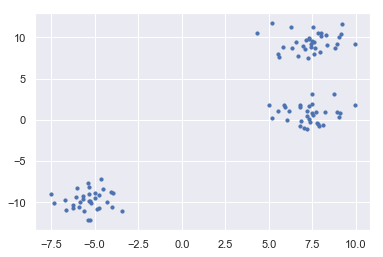

In [2]:
n_samples = 100
np.random.seed(0)
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
plt.scatter(X[:, 0], X[:, 1], s=10);

In [3]:
from sklearn.cluster import AgglomerativeClustering

In [4]:
# Queremos o aglomerativo com 3 grupos
agg = AgglomerativeClustering(n_clusters=3)

# ajustando o modelo
agg.fit(X)

# obtendo o identificador de grupo de cada ponto
y_agg = agg.labels_

# cada ponto é mapeado para um número, correspondente ao cluster
# ao qual foi associado
y_agg

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2])

### Veja que não há centroides

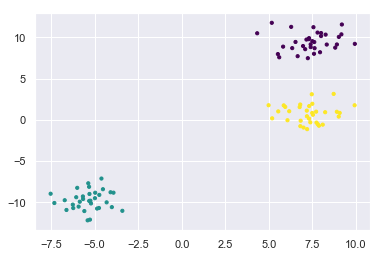

In [5]:
# Podemos ainda, visualizar a localização de cada centroide
_ = plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=10, cmap='viridis')

### Pode-se construir um dendrograma utilizando a biblioteca Scipy

Essa visualização é útil para determinar o número de grupos desejados.
Infelizmente, ela só é realmente útil quando tem-se poucos pontos

In [6]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import itertools

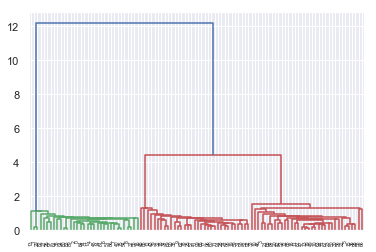

In [7]:
Z = []
n, d = X.shape
for x, y in itertools.combinations(X, 2):
    Z.append(np.linalg.norm(x - y))
Z = hierarchy.linkage(Z)
_ = hierarchy.dendrogram(Z)

## Há quatro variações, principais, do agrupamento aglomerativo

* Single Linkage
* Average Linkage
* Complete Linkage
* Ward Linkage

### Single Linkage

Calcula a distância entre dois grupos de pontos como sendo a distância entre os pontos mais **próximos** dos dois grupos

### Complete Linkage

Calcula a distância entre dois grupos de pontos como sendo a distância entre os pontos mais **distantes** dos dois grupos

### Average Linkage

Distância média entre os pontos de cada grupo

### Ward Linkage

Para cada ponto, calcula-se a diferença entre a distâcia do ponto ao centroide do grupo unificado e ao grupo a que pertence

### Há outras versões...

In [8]:
n_samples = 1500
def applyAgg(X, k, linkage):
    agg = AgglomerativeClustering(n_clusters = k, linkage = linkage) 
    agg.fit(X)
    y_agg = agg.labels_
    _ = plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=10, cmap='viridis')

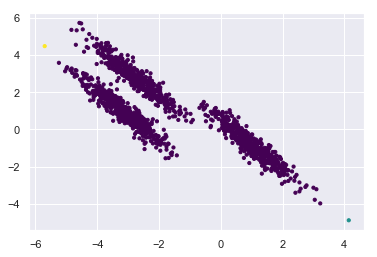

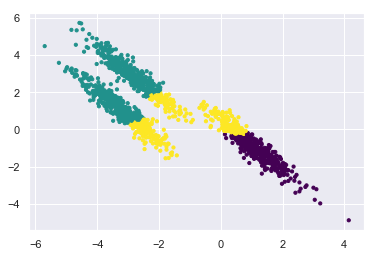

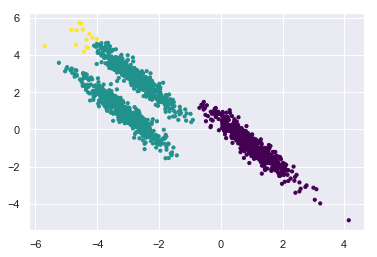

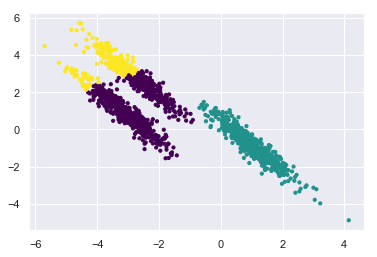

In [9]:
# Grupos elípticos

random_state = 170
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
X = X_aniso

for l in ['single', 'complete', 'average', 'ward']:
    plt.figure()
    applyAgg(X, 3, l)

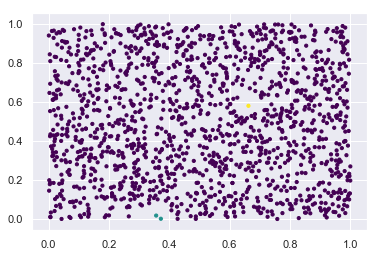

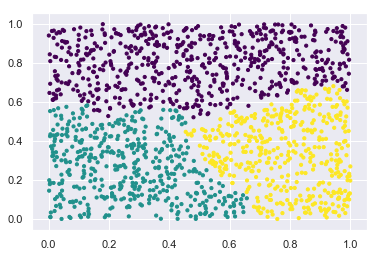

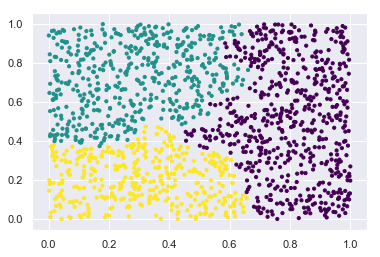

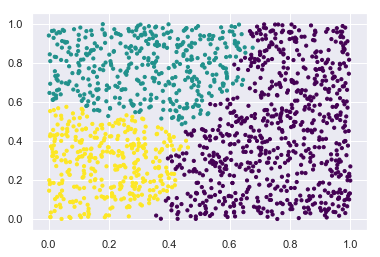

In [10]:
# Ruído

X = np.random.rand(n_samples, 2)
for l in ['single', 'complete', 'average', 'ward']:
    plt.figure()
    applyAgg(X, 3, l)

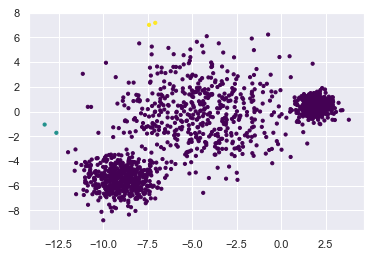

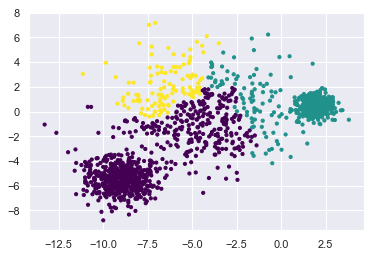

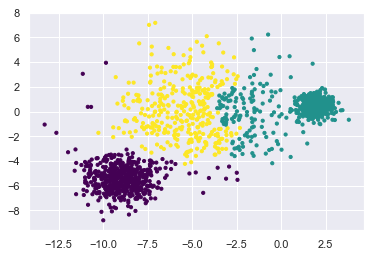

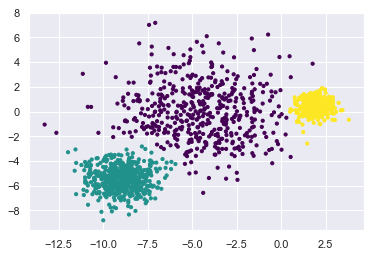

In [11]:
# Variâncias diferentes

X, _ = datasets.make_blobs(n_samples=n_samples,
                           cluster_std=[1.0, 2.5, 0.5],
                           random_state=random_state)
for l in ['single', 'complete', 'average', 'ward']:
    plt.figure()
    applyAgg(X, 3, l)

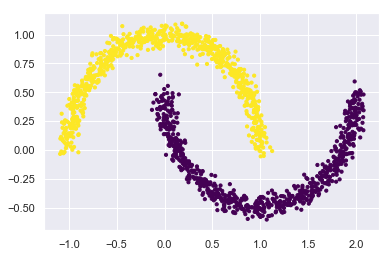

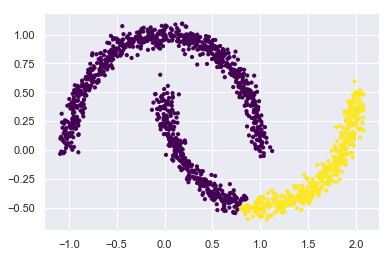

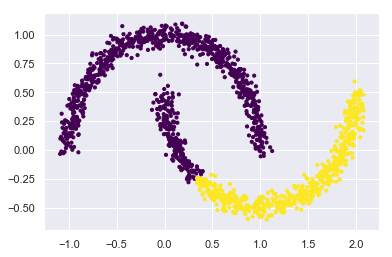

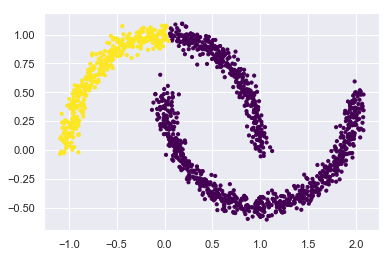

In [12]:
# luas

X, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
for l in ['single', 'complete', 'average', 'ward']:
    plt.figure()
    applyAgg(X, 2, l)

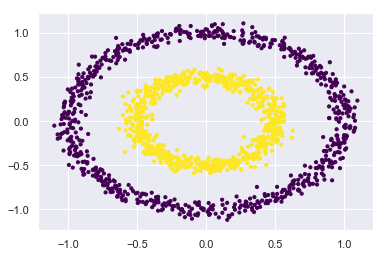

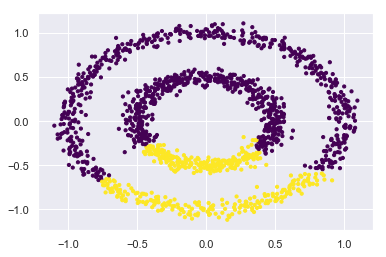

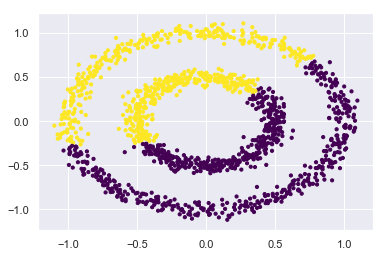

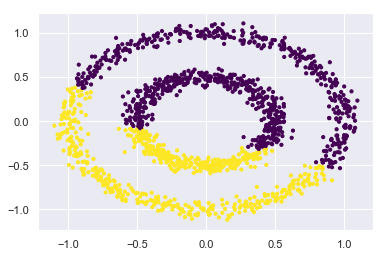

In [13]:
X, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
for l in ['single', 'complete', 'average', 'ward']:
    plt.figure()
    applyAgg(X, 2, l)